<a href="https://colab.research.google.com/github/ArpitSinghNegi/Credit-Card-Fraud-Detection/blob/main/CC_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
credit_card_data = pd.read_csv('/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# Seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# Comparing values of both types of transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of fraudulent transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating the two dataframes

In [ ]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55873,47165.0,1.223111,-0.942174,0.196413,-0.420355,-1.078497,-0.451728,-0.572279,0.023307,-0.216677,0.492314,-0.736290,-1.363092,-2.043686,0.040876,-0.082837,0.281718,1.117892,-1.938866,0.568877,0.022160,0.099471,0.171263,-0.112221,0.065022,0.518764,-0.116556,-0.004219,0.012913,80.44,0
277986,167971.0,2.092381,0.626048,-3.333508,0.517475,1.465234,-1.121519,0.701328,-0.304289,-0.179124,-0.870525,1.371123,0.136273,-0.447179,-2.203940,-0.651093,0.641768,1.803772,1.191194,0.127889,-0.116720,-0.044889,0.033444,-0.098276,0.175533,0.414005,0.685048,-0.087234,-0.027195,0.76,0
101530,67864.0,0.247216,-2.038345,-0.814706,-0.949485,-1.126259,-1.024306,0.772880,-0.310478,1.082574,-1.144063,1.231215,0.973316,-0.998711,0.765549,0.198893,-0.774874,0.044662,0.264776,1.152388,0.953028,0.327386,-0.117790,-0.647371,0.408990,0.560289,0.023342,-0.125449,0.084197,547.21,0
116072,74132.0,1.488525,-1.569483,-0.227522,-2.464646,0.253352,3.789319,-2.291989,1.013738,-1.373313,1.442282,-0.328233,-1.044004,0.739294,-0.652050,1.342398,0.522695,-0.298247,1.143650,-0.292673,-0.144417,0.030441,0.341055,-0.049865,1.006969,0.361059,-0.027576,0.083835,0.034107,27.25,0
271483,164594.0,1.926164,-0.001949,-1.915123,0.404778,0.337386,-1.013697,0.248887,-0.246579,0.336277,-0.372345,1.102290,0.651687,0.013547,-0.650410,0.233832,0.530919,0.108975,1.151189,-0.056484,-0.063473,0.255566,0.753094,-0.124680,-0.404528,0.246383,-0.107261,-0.015831,-0.032259,60.37,0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98141.601626,0.115135,0.036809,-0.058125,-0.004421,0.076015,-0.046721,0.018495,0.024912,-0.024495,-0.073272,-0.002680,0.050812,0.044976,-0.008505,-0.052705,0.018111,0.029909,0.067180,-0.029483,0.029179,0.012526,0.053026,0.002054,-0.042342,0.023007,-0.012105,0.014730,0.002278,81.371159
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3  ...       V26       V27       V28  Amount
55873    47165.0  1.223111 -0.942174  0.196413  ... -0.116556 -0.004219  0.012913   80.44
277986  167971.0  2.092381  0.626048 -3.333508  ...  0.685048 -0.087234 -0.027195    0.76
101530   67864.0  0.247216 -2.038345 -0.814706  ...  0.023342 -0.125449  0.084197  547.21
116072   74132.0  1.488525 -1.569483 -0.227522  ... -0.027576  0.083835  0.034107   27.25
271483  164594.0  1.926164 -0.001949 -1.915123  ... -0.107261 -0.015831 -0.032259   60.37
...          ...       ...       ...       ...  ...       ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653 -4.518331  ...  0.788395  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381 -5.004247  ...  0.739467  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366 -2.213700  ...  0.471111  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864 -5.399730  ...  0.606116  0.884876 -0.253700  245.00
281674  17

In [ ]:
print(Y)

55873     0
277986    0
101530    0
116072    0
271483    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting the data into Training Data and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [47]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [48]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.9440914866581956


In [49]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.934010152284264


Classification Report

In [51]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



Confusion Matrix

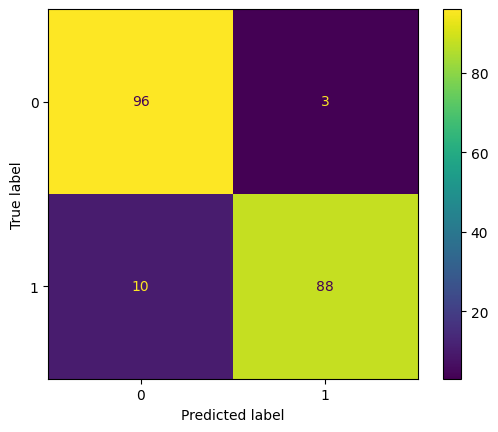

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

True Negatives (TN = 96): Model correctly predicted class 0 (non-fraud) when it was actually 0.

False Positives (FP = 3): Model predicted fraud (1) but the actual was not fraud (0).

False Negatives (FN = 10): Model predicted non-fraud (0), but it was actually fraud (1).

True Positives (TP = 88): Model correctly predicted fraud (1) when it was actually 1.

Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [55]:
from sklearn.metrics import accuracy_score

# Predict on training data
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(Y_train, rf_train_pred)
print("Random Forest - Accuracy on Training Data:", rf_train_acc)

# Predict on test data
rf_test_pred = rf_model.predict(X_test)
rf_test_acc = accuracy_score(Y_test, rf_test_pred)
print("Random Forest - Accuracy on Test Data:", rf_test_acc)

Random Forest - Accuracy on Training Data: 1.0
Random Forest - Accuracy on Test Data: 0.9289340101522843


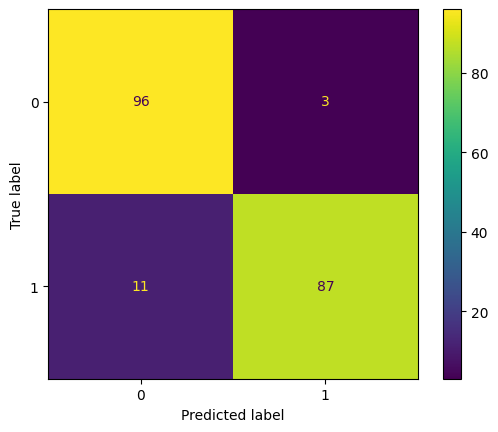

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_cm = confusion_matrix(Y_test, rf_test_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()

True Negatives (TN = 96): Model correctly predicted class 0 (non-fraud) when it was actually 0.

False Positives (FP = 3): Model predicted fraud (1) but the actual was not fraud (0).

False Negatives (FN = 11): Model predicted non-fraud (0), but it was actually fraud (1).

True Positives (TP = 87): Model correctly predicted fraud (1) when it was actually 1.



In [57]:
from sklearn.metrics import classification_report

print("Random Forest - Classification Report:\n")
print(classification_report(Y_test, rf_test_pred))

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

